# CHARGEMENT DES BIBLIOTHEQUES

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

 Chargement du jeu de données "LIGNES_TICKET_V4"

In [4]:
data3 = pd.read_csv("LIGNES_TICKET_V4.csv", sep='|', low_memory=False)
print(data3.shape)
print(list(data3.columns))

(34105705, 7)
['IDTICKET', 'NUMLIGNETICKET', 'IDARTICLE', 'QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']


La ligne de code ci-dessous nous permet de voir le détail des colonnes de notre jeu de données ainsi que le type de données (chaîne de caractères, numérique)

In [5]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   IDTICKET        int64 
 1   NUMLIGNETICKET  int64 
 2   IDARTICLE       object
 3   QUANTITE        object
 4   MONTANTREMISE   object
 5   TOTAL           object
 6   MARGESORTIE     object
dtypes: int64(2), object(5)
memory usage: 1.8+ GB
None


Aperçu du jeu de données.

In [6]:
data3.head(10)

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,"1,000",",000","4,96","2,37"
1,190400316262,2,33725,"1,000",",000","8,25","3,63"
2,190400316262,3,634497,"1,000",",000","5,79","3,63"
3,190400316262,1,257613,"1,000",",000","18,29","6,21"
4,190400316263,1,257627,"1,000",",000","49,92","10,42"
5,190400316265,1,320054,"1,000",",000","6,42",",67"
6,190400316265,3,835984,"1,000",",000","37,42","13,78"
7,190400316265,2,290491,"1,000",",000","5,42","4,22"
8,190400316270,6,932088,"1,000",",000","6,25","6,25"
9,190400316270,4,165207,"3,000","2,250","20,22","10,29"


In [191]:
data3.tail(10)

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
34105695,340200383182,4,36771,1,0,"7,46","5,81"
34105696,340200383182,5,179749,2,0,"14,92","8,78"
34105697,340200383182,6,699430,3,0,"19,87","13,75"
34105698,340200383182,7,784813,1,0,"8,29","5,32"
34105699,340200383203,1,257645,1,0,"4,69","1,84"
34105700,340200383203,2,257643,1,0,"4,69","1,83"
34105701,340200383203,3,50170,1,0,"3,18",1
34105702,340200383203,4,349345,1,0,"3,46","1,13"
34105703,340200383203,5,250580,2,0,"6,8","2,18"
34105704,340200383217,1,816313,20,"1,818","1,82","1,42"


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir les quantités, les montants, les totaux et les marges en valeur numérique.

In [39]:
data3['IDTICKET'] = data3['IDTICKET'].astype(str)
data3['NUMLIGNETICKET'] = data3['NUMLIGNETICKET'].astype(str)

In [40]:
data3["QUANTITE"]=data3['QUANTITE'].str.replace(',', '.').astype(float)

In [41]:
data3["TOTAL"]=data3['TOTAL'].str.replace(',', '.').astype(float)

In [42]:
data3["MONTANTREMISE"]=data3['MONTANTREMISE'].str.replace(',', '.').astype(float)

In [43]:
data3["MARGESORTIE"]=data3['MARGESORTIE'].str.replace(',', '.').astype(float)

Vérification du traitement.

In [44]:
print(data3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105705 entries, 0 to 34105704
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IDTICKET        object 
 1   NUMLIGNETICKET  object 
 2   IDARTICLE       object 
 3   QUANTITE        float64
 4   MONTANTREMISE   float64
 5   TOTAL           float64
 6   MARGESORTIE     float64
dtypes: float64(4), object(3)
memory usage: 1.8+ GB
None


In [45]:
data3

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,190400316260,2,246208,1.0,0.000,4.96,2.37
1,190400316262,2,33725,1.0,0.000,8.25,3.63
2,190400316262,3,634497,1.0,0.000,5.79,3.63
3,190400316262,1,257613,1.0,0.000,18.29,6.21
4,190400316263,1,257627,1.0,0.000,49.92,10.42
...,...,...,...,...,...,...,...
34105700,340200383203,2,257643,1.0,0.000,4.69,1.83
34105701,340200383203,3,50170,1.0,0.000,3.18,1.00
34105702,340200383203,4,349345,1.0,0.000,3.46,1.13
34105703,340200383203,5,250580,2.0,0.000,6.80,2.18


In [46]:
data3.describe()

,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
count,3.410570e+07,3.410570e+07,3.410570e+07,3.410570e+07
mean,1.330773e+00,9.912670e-01,9.937605e+00,4.224984e+00
std,2.269013e+00,6.086740e+00,2.426155e+01,1.166608e+01
min,-1.550000e+02,-4.269420e+02,-1.500000e+04,-1.500000e+04
25%,1.000000e+00,0.000000e+00,2.820000e+00,9.900000e-01
50%,1.000000e+00,0.000000e+00,5.210000e+00,2.260000e+00
75%,1.000000e+00,4.730000e-01,1.050000e+01,5.210000e+00
max,9.990000e+02,1.316667e+04,1.500000e+04,1.500000e+04


In [47]:
columns=['QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']
data3[columns].shape

(34105705, 4)

In [48]:
data3[columns].max()

QUANTITE           999.000
MONTANTREMISE    13166.667
TOTAL            15000.000
MARGESORTIE      15000.000
dtype: float64

Il convient à présent de vérifier la présence de valeur aberrantes.

In [49]:
def boxplot(data3):
    plt.figure(figsize=(16, 6))
    sns.boxplot(data=data3)
    plt.grid()


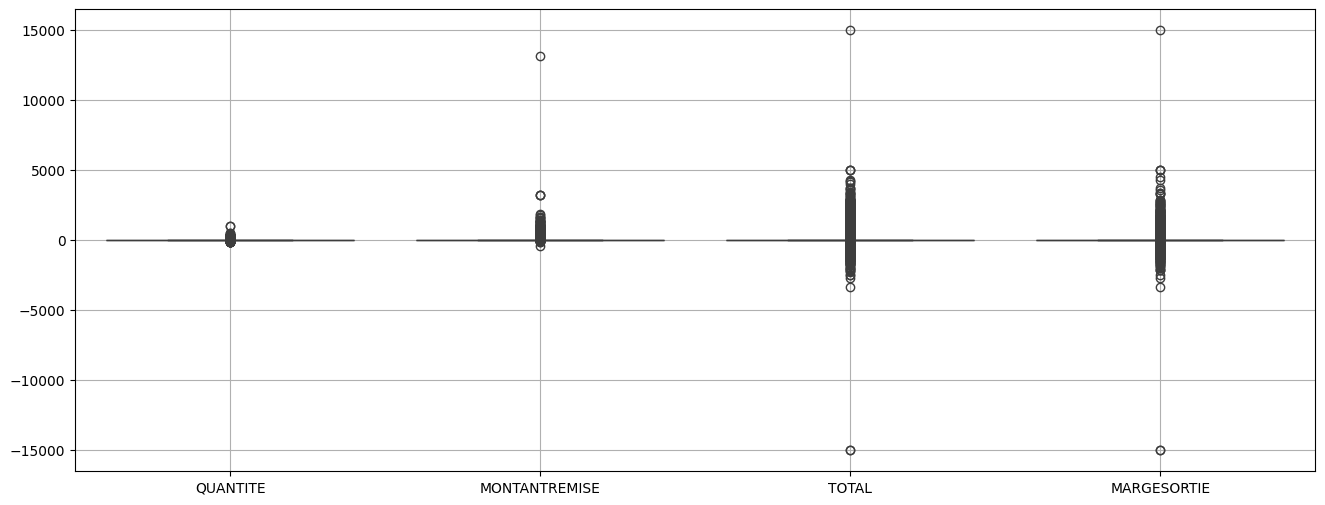

In [210]:
boxplot(data3)

In [214]:
from pandas.api.types import is_numeric_dtype

# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data3, column):
    Q1 = data3[column].quantile(0.25)
    Q3 = data3[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data3[(data3[column] < lower_bound) | (data3[column] > upper_bound)]
    return outliers

# Boucler à travers les colonnes numériques pour détecter les outliers
for col in data3.columns:
    if is_numeric_dtype(data3[col]):
        outliers = detect_outliers_iqr(data3, col)
        if len(outliers) > 0:
            print(f"Outliers détectés dans la colonne '{col}':")
            print(outliers)

Outliers détectés dans la colonne 'QUANTITE':
              IDTICKET NUMLIGNETICKET IDARTICLE  QUANTITE  MONTANTREMISE  \
9         190400316270              4    165207       3.0          2.250   
10        190400316270              5    165291       3.0          1.483   
18        190400316273              4    248244       2.0          0.000   
23        190400316273              7    248214       2.0          0.000   
37        190400316277              1    784645       3.0          0.000   
...                ...            ...       ...       ...            ...   
34105688  130400568238              4    155554       2.0          0.000   
34105696  340200383182              5    179749       2.0          0.000   
34105697  340200383182              6    699430       3.0          0.000   
34105703  340200383203              5    250580       2.0          0.000   
34105704  340200383217              1    816313      20.0          1.818   

          TOTAL  MARGESORTIE  
9         

In [221]:
# Fonction pour imputer les outliers 
def impute_outliers(data3, columns):
    Q1 = np.percentile(data3[columns],25)
    Q3 = np.percentile(data3[columns],75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data3.loc[data3[columns] < lower_bound, columns] = lower_bound 
    data3.loc[data3[columns] > upper_bound,columns]=upper_bound
for columns in columns:
    impute_outliers(data3,columns)

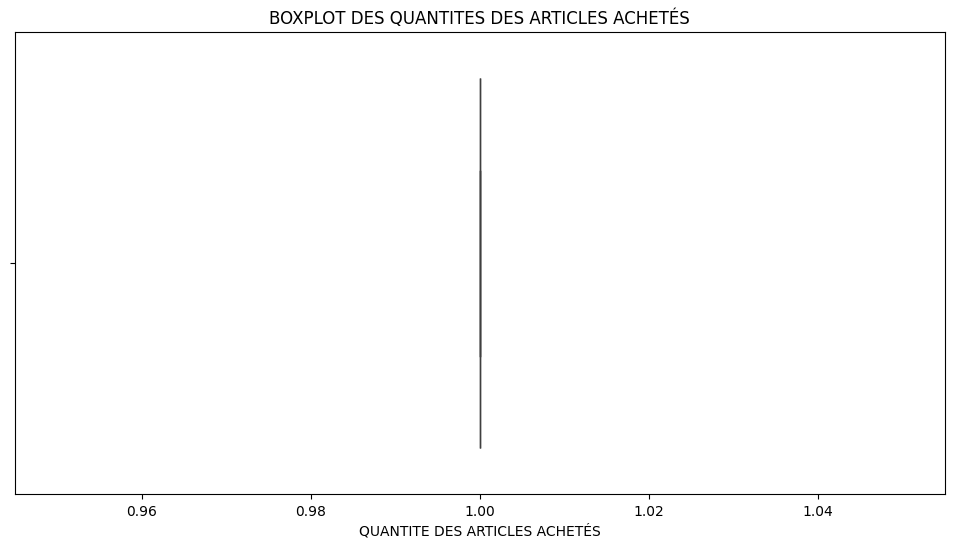

In [182]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x='QUANTITE')
plt.xlabel('QUANTITE DES ARTICLES ACHETÉS')
plt.title("BOXPLOT DES QUANTITES DES ARTICLES ACHETÉS")
plt.show()

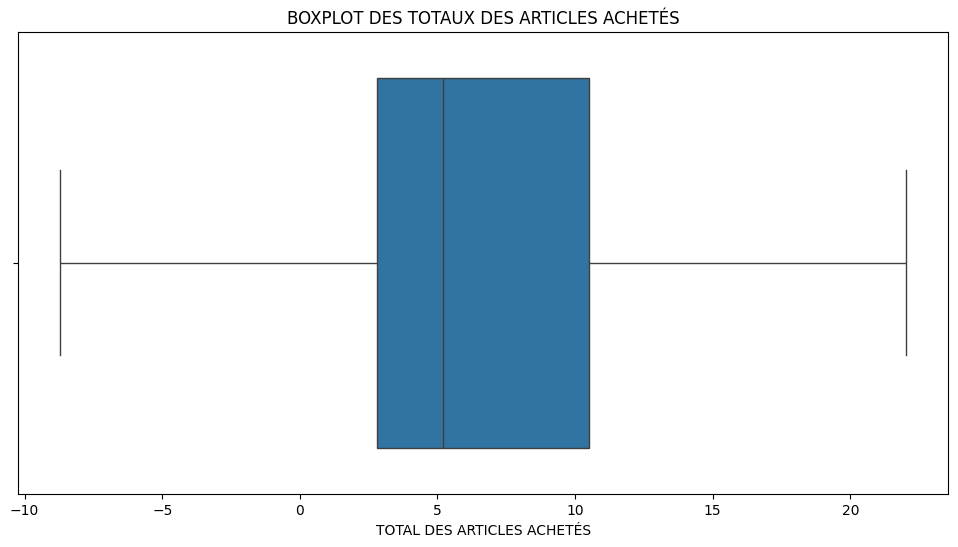

In [183]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x='TOTAL')
plt.xlabel('TOTAL DES ARTICLES ACHETÉS')
plt.title("BOXPLOT DES TOTAUX DES ARTICLES ACHETÉS")
plt.show()

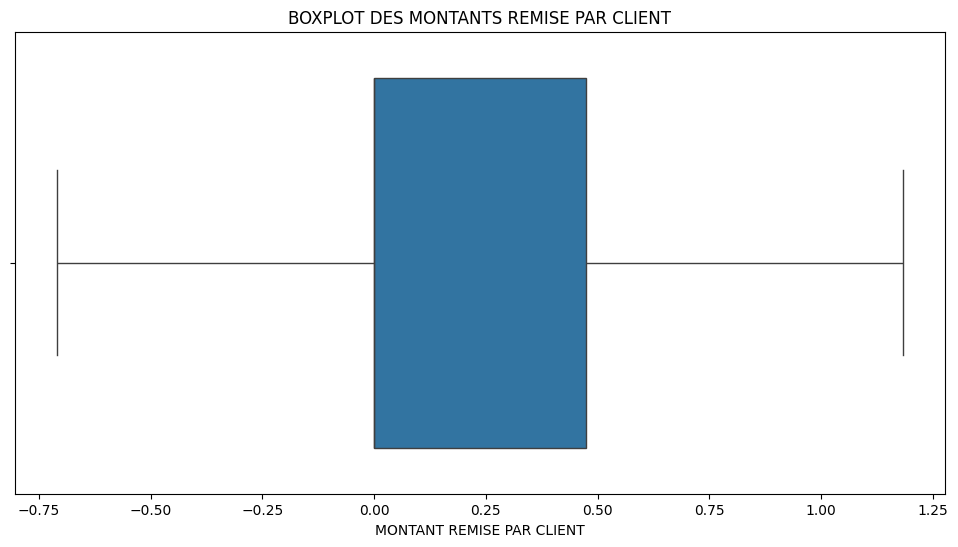

In [184]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x='MONTANTREMISE')
plt.xlabel('MONTANT REMISE PAR CLIENT')
plt.title("BOXPLOT DES MONTANTS REMISE PAR CLIENT")
plt.show()

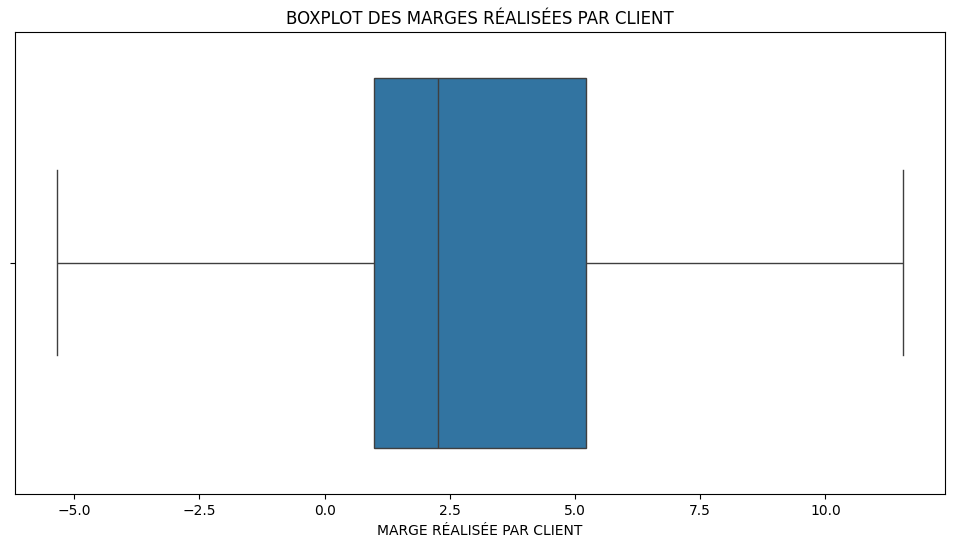

In [108]:
# Visualiser les outliers en utilisant un boxplot avec Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(data=data3, x='MARGESORTIE')
plt.xlabel('MARGE RÉALISÉE PAR CLIENT')
plt.title("BOXPLOT DES MARGES RÉALISÉES PAR CLIENT")
plt.show()

In [222]:
import numpy as np
columns= ['QUANTITE', 'MONTANTREMISE', 'TOTAL', 'MARGESORTIE']
# Créer un sous-dataset composé uniquement des outliers
def subdataset_outliers(data3, columns):
    Q1 = np.percentile(data3[columns], 25)
    Q3 = np.percentile(data3[columns], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data3[(data3[columns] < lower_bound) | (data3[columns] > upper_bound)]

# Appliquer la fonction pour une colonne spécifique
outliers_subset = subdataset_outliers(data3, columns)

In [223]:
# Appel à la fonction detect_outliers_iqr() pour obtenir les bornes lower_bound et upper_bound
outliers = detect_outliers_iqr(data3, columns)
lower_bound = outliers[columns].min()
upper_bound = outliers[columns].max()

# Remplacement des outliers par les bornes
data3[columns] = np.where(data3[columns] < lower_bound, lower_bound, data3[columns])
data3[columns] = np.where(data3[columns] > upper_bound, upper_bound, data3[columns])

In [224]:
data3[columns].shape

(34105705, 4)

In [225]:
data3[columns].max()

QUANTITE          1.0000
MONTANTREMISE     1.1825
TOTAL            22.0200
MARGESORTIE      11.5400
dtype: float64

In [226]:
data3[columns]

,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
0,1.0,0.0000,4.96,2.37
1,1.0,0.0000,8.25,3.63
2,1.0,0.0000,5.79,3.63
3,1.0,0.0000,18.29,6.21
4,1.0,0.0000,22.02,10.42
...,...,...,...,...
34105700,1.0,0.0000,4.69,1.83
34105701,1.0,0.0000,3.18,1.00
34105702,1.0,0.0000,3.46,1.13
34105703,1.0,0.0000,6.80,2.18


In [227]:
data3.describe()

,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE
count,34105705.0,3.410570e+07,3.410570e+07,3.410570e+07
mean,1.0,2.790697e-01,7.553460e+00,3.461244e+00
std,0.0,4.499037e-01,6.522058e+00,3.454784e+00
min,1.0,-7.095000e-01,-8.700000e+00,-5.340000e+00
25%,1.0,0.000000e+00,2.820000e+00,9.900000e-01
50%,1.0,0.000000e+00,5.210000e+00,2.260000e+00
75%,1.0,4.730000e-01,1.050000e+01,5.210000e+00
max,1.0,1.182500e+00,2.202000e+01,1.154000e+01


La ligne de code ci-dessous nous permet d'identifier les valeurs en doublons qui conviendra de traiter.

In [50]:
print(data3.duplicated().sum())
data = data3.drop_duplicates()

130


Nous allons désormais procéder au traitement de ces doublons.

In [51]:
data3.drop_duplicates(keep='first', inplace=True)

Code de vérification.

In [52]:
print(data3.duplicated().sum())

0


Nous procédons également à la vérification de présence ou non de valeurs manquantes (aucune valeur détectée).

In [53]:
data3.isnull().sum()

IDTICKET          0
NUMLIGNETICKET    0
IDARTICLE         0
QUANTITE          0
MONTANTREMISE     0
TOTAL             0
MARGESORTIE       0
dtype: int64

Chargement du jeu de données ENTETES TICKET V4.

In [54]:
data2 = pd.read_csv("ENTETES_TICKET_V4.csv", sep='|', low_memory=False)
print(data2.shape)
print(list(data2.columns))


(6714173, 5)
['IDTICKET', 'TIC_DATE', 'MAG_CODE', 'IDCLIENT', 'TIC_TOTALTTC']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [55]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      int64  
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      float64
 4   TIC_TOTALTTC  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 256.1+ MB


Aperçu de notre jeu de données. 

In [56]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,2016-01-02 11:01:33,ALB,2995104.0,"12,9"
1,50100150511,2016-01-02 11:02:10,ALB,1411117.0,"131,06"
2,50100150515,2016-01-02 12:03:27,ALB,222592.0,"34,69"
3,50100150517,2016-01-02 14:23:21,ALB,2979958.0,"97,58"
4,50100150518,2016-01-02 14:26:53,ALB,2858676.0,"4,7"
...,...,...,...,...,...
6714168,1340300014404,2016-12-27 16:31:52,RMA,2292927.0,"59,45"
6714169,1340300014407,2016-12-27 16:35:21,RMA,3189844.0,"26,9"
6714170,1340300014409,2016-12-27 16:38:59,RMA,3125998.0,"22,15"
6714171,1340300014438,2016-12-27 17:17:30,RMA,3252348.0,"118,01"


Afin d'exploiter de façon optimale les informations, nous allons convetir les l'ID TICKET et le NUM LIGNE TICKET en caractère. A l'inverse, nous devons convertir le total TTC en valeur numérique.

In [57]:
data2['IDTICKET'] = data2['IDTICKET'].astype(str)
data2['IDCLIENT'] = data2['IDCLIENT'].astype(str)

In [58]:
data2['TIC_TOTALTTC'] = data2['TIC_TOTALTTC'].str.replace(',', '.')

In [59]:
data2['TIC_TOTALTTC'] = data2['TIC_TOTALTTC'].str.strip('\"')

In [60]:
data2['TIC_TOTALTTC'] = pd.to_numeric(data2['TIC_TOTALTTC'], errors='coerce')

Vérification du traitement.

In [61]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      object 
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      object 
 4   TIC_TOTALTTC  float64
dtypes: float64(1), object(4)
memory usage: 256.1+ MB


In [62]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,2016-01-02 11:01:33,ALB,2995104.0,12.90
1,50100150511,2016-01-02 11:02:10,ALB,1411117.0,131.06
2,50100150515,2016-01-02 12:03:27,ALB,222592.0,34.69
3,50100150517,2016-01-02 14:23:21,ALB,2979958.0,97.58
4,50100150518,2016-01-02 14:26:53,ALB,2858676.0,4.70
...,...,...,...,...,...
6714168,1340300014404,2016-12-27 16:31:52,RMA,2292927.0,59.45
6714169,1340300014407,2016-12-27 16:35:21,RMA,3189844.0,26.90
6714170,1340300014409,2016-12-27 16:38:59,RMA,3125998.0,22.15
6714171,1340300014438,2016-12-27 17:17:30,RMA,3252348.0,118.01


La ligne de code ci-dessous nous permet de formater le format de la date.

In [63]:
from datetime import datetime
data2['TIC_DATE'] = pd.to_datetime(data2['TIC_DATE'], format="%Y-%m-%d %H:%M:%S")
data2['TIC_DATE'] = data2['TIC_DATE'].dt.strftime("%d/%m/%Y")

Vérification du traitement.

In [64]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC
0,50100150510,02/01/2016,ALB,2995104.0,12.90
1,50100150511,02/01/2016,ALB,1411117.0,131.06
2,50100150515,02/01/2016,ALB,222592.0,34.69
3,50100150517,02/01/2016,ALB,2979958.0,97.58
4,50100150518,02/01/2016,ALB,2858676.0,4.70
...,...,...,...,...,...
6714168,1340300014404,27/12/2016,RMA,2292927.0,59.45
6714169,1340300014407,27/12/2016,RMA,3189844.0,26.90
6714170,1340300014409,27/12/2016,RMA,3125998.0,22.15
6714171,1340300014438,27/12/2016,RMA,3252348.0,118.01


Cette ligne de code nous permet d'identifier le nombre d'occurence de chaque code magasin, pour identifier les éventuels regroupements à effectuer. 

In [65]:
#modalités variables:
data2['MAG_CODE'].value_counts(dropna = False)

MAG_CODE
SSM    246506
MOB    221283
HEI    219713
BEA    205468
GEX    196669
        ...  
CLI     31063
STR     26694
SCH     25502
BAR     18254
SAL     18245
Name: count, Length: 66, dtype: int64

La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) en doublons.

In [66]:
print(data2.duplicated().sum())
data2 = data2.drop_duplicates()

0


La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) manquante(s)

In [67]:
pd.DataFrame(index=data2.columns, columns=['%_missing_values'], data= (data2.isna().sum().values / len(data2)*100))

,%_missing_values
IDTICKET,0.0
TIC_DATE,0.0
MAG_CODE,0.0
IDCLIENT,0.0
TIC_TOTALTTC,0.0


CALCUL DU NOMBRES DE MAGASINS (Mag Code) FREQUENTE PAR UN CLIENT (ID Client).

In [68]:
data2['IDCLIENT'] = data2['IDCLIENT'].astype(float)

In [69]:
data2['IDCLIENT'] = data2['IDCLIENT'].astype(int)

In [70]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714173 entries, 0 to 6714172
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   IDTICKET      object 
 1   TIC_DATE      object 
 2   MAG_CODE      object 
 3   IDCLIENT      int64  
 4   TIC_TOTALTTC  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 256.1+ MB


In [71]:

# Calcul de la fréquence et du total des achats par magasin et par client
data2['FREQUENCE_MAG'] = data2.groupby(['MAG_CODE', 'IDCLIENT'])['IDTICKET'].transform('count')

# Afficher le résultat
print(data2.head())

      IDTICKET    TIC_DATE MAG_CODE  IDCLIENT  TIC_TOTALTTC  FREQUENCE_MAG
0  50100150510  02/01/2016      ALB   2995104         12.90             35
1  50100150511  02/01/2016      ALB   1411117        131.06              4
2  50100150515  02/01/2016      ALB    222592         34.69             21
3  50100150517  02/01/2016      ALB   2979958         97.58             28
4  50100150518  02/01/2016      ALB   2858676          4.70             11


In [72]:
data2

,IDTICKET,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG
0,50100150510,02/01/2016,ALB,2995104,12.90,35
1,50100150511,02/01/2016,ALB,1411117,131.06,4
2,50100150515,02/01/2016,ALB,222592,34.69,21
3,50100150517,02/01/2016,ALB,2979958,97.58,28
4,50100150518,02/01/2016,ALB,2858676,4.70,11
...,...,...,...,...,...,...
6714168,1340300014404,27/12/2016,RMA,2292927,59.45,5
6714169,1340300014407,27/12/2016,RMA,3189844,26.90,78
6714170,1340300014409,27/12/2016,RMA,3125998,22.15,31
6714171,1340300014438,27/12/2016,RMA,3252348,118.01,12


In [73]:
data2['FREQUENCE_MAG'].value_counts()

FREQUENCE_MAG
2      276456
3      273510
4      268312
5      258610
1      254447
        ...  
195       195
190       190
181       181
180       180
164       164
Name: count, Length: 253, dtype: int64

In [88]:
data_merged=data3.merge(data2, how='right',left_on='IDTICKET', right_on='IDTICKET')

In [75]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG
0,50100150510,1,224168,1.0,0.000,10.75,6.46,02/01/2016,ALB,2995104,12.90,35
1,50100150511,6,932088,1.0,0.000,6.25,6.25,02/01/2016,ALB,1411117,131.06,4
2,50100150511,2,397817,1.0,0.625,5.62,2.54,02/01/2016,ALB,1411117,131.06,4
3,50100150511,5,758445,1.0,3.158,28.42,14.28,02/01/2016,ALB,1411117,131.06,4
4,50100150511,3,428877,1.0,0.333,2.96,0.94,02/01/2016,ALB,1411117,131.06,4
...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,1340300014438,4,279749,1.0,0.750,6.71,3.08,27/12/2016,RMA,3252348,118.01,12
34105922,1340300014438,10,287843,4.0,10.950,25.55,10.63,27/12/2016,RMA,3252348,118.01,12
34105923,1340300014440,2,363834,1.0,0.000,19.95,10.40,27/12/2016,RMA,3243933,44.80,4
34105924,1340300014440,3,632190,1.0,0.000,19.95,10.49,27/12/2016,RMA,3243933,44.80,4


In [76]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34105926 entries, 0 to 34105925
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   IDTICKET        object 
 1   NUMLIGNETICKET  object 
 2   IDARTICLE       object 
 3   QUANTITE        float64
 4   MONTANTREMISE   float64
 5   TOTAL           float64
 6   MARGESORTIE     float64
 7   TIC_DATE        object 
 8   MAG_CODE        object 
 9   IDCLIENT        int64  
 10  TIC_TOTALTTC    float64
 11  FREQUENCE_MAG   int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 3.0+ GB


In [77]:
# Calcul de la variété du panier par client
VARIETE_PANIER = data_merged.groupby('IDCLIENT')['IDARTICLE'].nunique().reset_index()
VARIETE_PANIER.columns = ['IDCLIENT', 'VARIETE_PANIER']

# Fusionner la variable de variété du panier avec le DataFrame original
data_merged = data_merged.merge(VARIETE_PANIER, on='IDCLIENT', how='right')

In [78]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG,VARIETE_PANIER
0,200200135291,3,33258,1.0,0.000,0.91,0.54,05/02/2016,IAB,2108,7.57,2,7
1,200200135291,2,33247,1.0,0.000,1.24,0.72,05/02/2016,IAB,2108,7.57,2,7
2,200200135291,1,227040,1.0,1.782,4.54,1.56,05/02/2016,IAB,2108,7.57,2,7
3,200500180521,1,312922,1.0,0.545,4.86,2.71,08/05/2016,IAB,2108,20.58,2,7
4,200500180521,4,932088,1.0,0.000,6.25,6.25,08/05/2016,IAB,2108,20.58,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,770100547217,6,217360,1.0,0.227,2.09,0.32,31/12/2017,PEG,3517102,55.67,1,10
34105922,770100547217,7,33257,1.0,0.075,0.67,0.39,31/12/2017,PEG,3517102,55.67,1,10
34105923,770100547217,8,33247,1.0,0.133,1.16,0.64,31/12/2017,PEG,3517102,55.67,1,10
34105924,770100547217,9,58830,1.0,0.275,2.47,0.85,31/12/2017,PEG,3517102,55.67,1,10


In [79]:
data_merged['VARIETE_PANIER'].value_counts()

VARIETE_PANIER
27     291932
22     291685
20     291132
24     290634
23     290262
        ...  
588       823
612       761
601       688
471       673
537       661
Name: count, Length: 732, dtype: int64

In [80]:
VARIETE_PANIER = VARIETE_PANIER.astype(int)

In [84]:
# Calculer le montant total de remises par client
TOTAL_REMISE_CLIENT = data_merged.groupby('IDCLIENT')['MONTANTREMISE'].sum()

# Calculer le montant total dépensé par chaque client
TOTAL_DEPENSES = data_merged.groupby('IDCLIENT')['TOTAL'].sum()

# Calculer le taux de remise pour chaque client
TAUX_REMISE = TOTAL_REMISE_CLIENT / TOTAL_DEPENSES
# Nommer la série de taux de remise
TAUX_REMISE.name = 'TAUX_REMISE'

# Fusionner la variable de taux de remise avec le DataFrame original
data_merged = data_merged.merge(TAUX_REMISE, on='IDCLIENT', how='left')

In [85]:
data_merged['TAUX_REMISE'].value_counts()

TAUX_REMISE
0.000000    323683
0.013617      5570
0.255264      4729
0.023054      4229
0.013317      4209
             ...  
0.250304         1
0.176282         1
0.333811         1
0.530626         1
0.250030         1
Name: count, Length: 706980, dtype: int64

In [87]:
# Calculer l'ancienneté par rapport à la première commande pour chaque client
data_merged['ANCIENNETE_PRE_CDE'] = data_merged.groupby('IDCLIENT')['TIC_DATE'].transform(lambda x: (x - x.min()).dt.days)

# Calculer l'ancienneté par rapport à la dernière commande pour chaque client
data_merged['ANCIENNETE_DRE_CDE'] = data_merged.groupby('IDCLIENT')['TIC_DATE'].transform(lambda x: (x.max() - x).dt.days)

# Afficher l'ancienneté par rapport à la première et à la dernière commande pour chaque client
print(data_merged[['IDCLIENT', 'TIC_DATE', 'ANCIENNETE_PRE_CDE', 'ANCIENNETE_DRE_CDE']])

          IDCLIENT   TIC_DATE  ANCIENNETE_PRE_CDE  ANCIENNETE_DRE_CDE
0             2108 2016-02-05                   0                  93
1             2108 2016-02-05                   0                  93
2             2108 2016-02-05                   0                  93
3             2108 2016-05-08                  93                   0
4             2108 2016-05-08                  93                   0
...            ...        ...                 ...                 ...
34105921   3517102 2017-12-31                   0                   0
34105922   3517102 2017-12-31                   0                   0
34105923   3517102 2017-12-31                   0                   0
34105924   3517102 2017-12-31                   0                   0
34105925   3517102 2017-12-31                   0                   0

[34105926 rows x 4 columns]


In [89]:
data_merged

,IDTICKET,NUMLIGNETICKET,IDARTICLE,QUANTITE,MONTANTREMISE,TOTAL,MARGESORTIE,TIC_DATE,MAG_CODE,IDCLIENT,TIC_TOTALTTC,FREQUENCE_MAG
0,50100150510,1,224168,1.0,0.000,10.75,6.46,02/01/2016,ALB,2995104,12.90,35
1,50100150511,6,932088,1.0,0.000,6.25,6.25,02/01/2016,ALB,1411117,131.06,4
2,50100150511,2,397817,1.0,0.625,5.62,2.54,02/01/2016,ALB,1411117,131.06,4
3,50100150511,5,758445,1.0,3.158,28.42,14.28,02/01/2016,ALB,1411117,131.06,4
4,50100150511,3,428877,1.0,0.333,2.96,0.94,02/01/2016,ALB,1411117,131.06,4
...,...,...,...,...,...,...,...,...,...,...,...,...
34105921,1340300014438,4,279749,1.0,0.750,6.71,3.08,27/12/2016,RMA,3252348,118.01,12
34105922,1340300014438,10,287843,4.0,10.950,25.55,10.63,27/12/2016,RMA,3252348,118.01,12
34105923,1340300014440,2,363834,1.0,0.000,19.95,10.40,27/12/2016,RMA,3243933,44.80,4
34105924,1340300014440,3,632190,1.0,0.000,19.95,10.49,27/12/2016,RMA,3243933,44.80,4


# CHARGEMENT DES BIBLIOTHEQUES

Chargement du jeu de données REF_ARTICLE.

In [56]:
import pandas as pd

data4 = pd.read_csv('REF_ARTICLE.CSV', sep='|',low_memory=False)
print(data4.shape)
print(list(data4.columns))


(665946, 4)
['CODEARTICLE', 'CODEUNIVERS', 'CODEFAMILLE', 'CODESOUSFAMILLE']


La ligne de code ci-dessous nous permet de connaître le détail des colonnes ainsi que le type de données constituant notre base (numérique ou caractères).

In [57]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665946 entries, 0 to 665945
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   CODEARTICLE      665946 non-null  object
 1   CODEUNIVERS      665946 non-null  object
 2   CODEFAMILLE      665946 non-null  object
 3   CODESOUSFAMILLE  665946 non-null  object
dtypes: object(4)
memory usage: 20.3+ MB


Aperçu de notre jeu de données. 

In [58]:
data4

,CODEARTICLE,CODEUNIVERS,CODEFAMILLE,CODESOUSFAMILLE
0,COUPON,COUPON,COUPON,COUPON
1,1001,U2,130,130040
2,100125,U1,010,010020
3,100150,U1,010,010020
4,10018,U1,100,100900
...,...,...,...,...
665941,407717,U3,120,120070
665942,407719,U3,120,120070
665943,407720,U3,120,120070
665944,407721,U3,120,120070


In [59]:
data4.drop(0, inplace=True)

In [60]:
data4

,CODEARTICLE,CODEUNIVERS,CODEFAMILLE,CODESOUSFAMILLE
1,1001,U2,130,130040
2,100125,U1,010,010020
3,100150,U1,010,010020
4,10018,U1,100,100900
5,10019,U1,100,100900
...,...,...,...,...
665941,407717,U3,120,120070
665942,407719,U3,120,120070
665943,407720,U3,120,120070
665944,407721,U3,120,120070


In [61]:
#modalités variables:
data4['CODEARTICLE'].value_counts(dropna = False)

CODEARTICLE
407723    1
1001      1
100125    1
100150    1
10018     1
         ..
100889    1
1010      1
1012      1
101240    1
101253    1
Name: count, Length: 665945, dtype: int64

In [62]:
data4['CODEUNIVERS'].value_counts(dropna = False)

CODEUNIVERS
U1    274652
U2    236139
U3     72725
U4     66413
U0     16016
Name: count, dtype: int64

In [63]:
data4['CODEFAMILLE'].value_counts(dropna = False)

CODEFAMILLE
090    157747
010     65324
130     63055
120     60886
180     46685
080     36253
100     33971
140     33907
020     31685
220     30893
050     22395
030     22165
070     14484
110     11839
160      8561
190      6449
040      5176
400      3884
170      3570
900      2196
200      1613
230      1092
060       979
210       853
990       283
Name: count, dtype: int64

In [64]:
data4['CODESOUSFAMILLE'].value_counts(dropna = False)

CODESOUSFAMILLE
180090    44779
140010    23698
120060    23371
090800    23326
090070    21254
          ...  
900990        1
180999        1
160999        1
110999        1
200999        1
Name: count, Length: 343, dtype: int64

La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) en doublons.

In [65]:
print(data4.duplicated().sum())
data1 = data4.drop_duplicates()

0


La ligne de code ci-dessous nous permet d'identifier la présence ou non de valeur(s) manquante(s)

In [66]:
pd.DataFrame(index=data4.columns, columns=['%_missing_values'], data= (data4.isna().sum().values / len(data4)*100))

,%_missing_values
CODEARTICLE,0.0
CODEUNIVERS,0.0
CODEFAMILLE,0.0
CODESOUSFAMILLE,0.0
